#### Apply Agglomerative algo on mall_customers data to get customer segmentation based on annual income and spending of the customer.

#### Importing required Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

#### Loading the Data Set

In [5]:
df=pd.read_csv("C:\\Users\\rupan\\OneDrive - stu.aud.ac.in\\Desktop\\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Checking shape of data

In [6]:
df.shape

(200, 5)

#### checking missing values

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- Taking two features [2-D] spending score and annual score for seggregation.

#### Seggregate X and Y

In [8]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Scatter plot

Text(0, 0.5, 'Spending score')

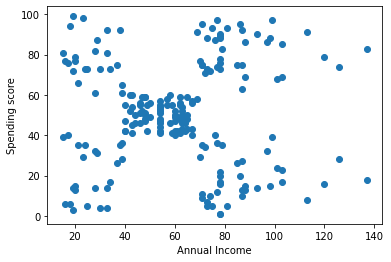

In [9]:
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending score")

#### Dendograms - for optimal no of clusters

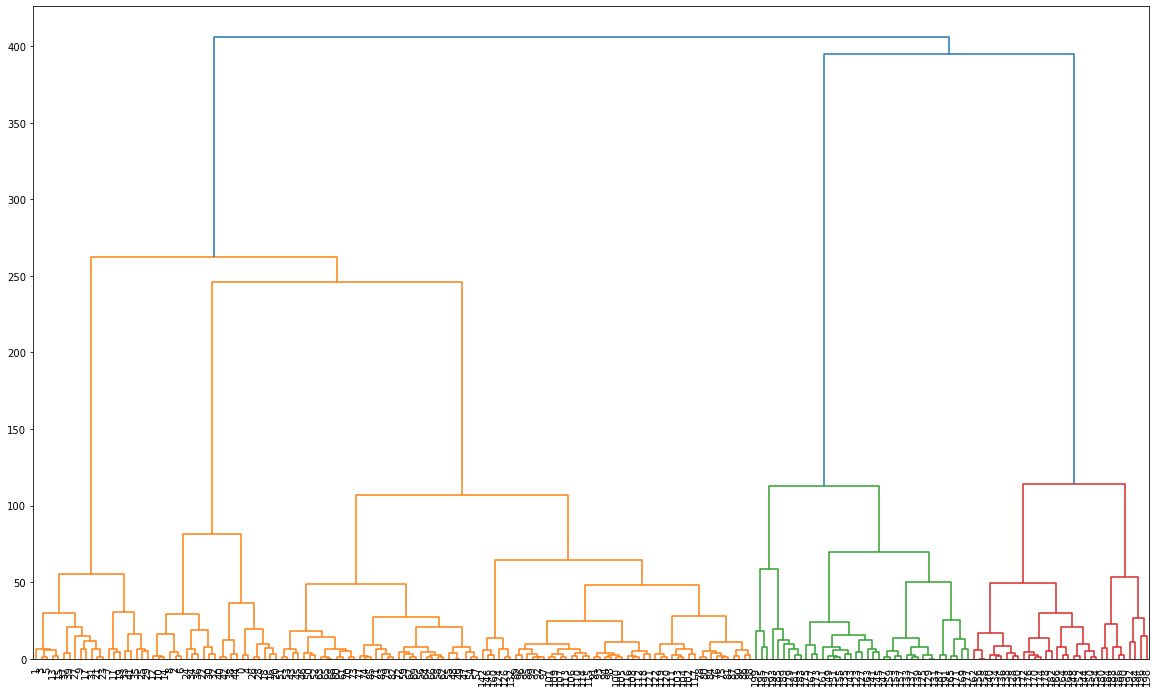

In [13]:
plt.figure(figsize=(20,12))
shc.dendrogram(shc.linkage(x,method="ward"))
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [14]:
ac=AgglomerativeClustering(n_clusters=5)
clusters=ac.fit_predict(x)
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

- no of clusters are 5 as horizontal line cuts at 5 points.

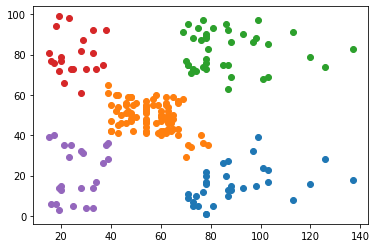

In [15]:
plt.scatter(x[clusters==0]["Annual Income (k$)"],x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==1]["Annual Income (k$)"],x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"],x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"],x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"],x[clusters==4]["Spending Score (1-100)"])

In [17]:
silhouette_score(x,ac.labels_)

0.5529945955148897